In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , BaggingClassifier
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense

In [49]:
data = pd.read_excel(r"C:\Users\user\Downloads\bankruptcy-prevention.xlsx")

In [50]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [52]:
data.head(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [53]:
data.tail(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [54]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [55]:
len(data)

250

In [56]:
data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [57]:
data['industrial_risk'].value_counts()

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [58]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [59]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_7912\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


In [61]:
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_7912\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


industrial_risk          -0.067011
 management_risk         -0.444701
 financial_flexibility    0.479134
 credibility              0.112955
 competitiveness          0.093906
 operating_risk          -0.275547
dtype: float64

In [62]:
data.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_7912\2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


industrial_risk          -1.521223
 management_risk         -1.378700
 financial_flexibility   -1.290455
 credibility             -1.545520
 competitiveness         -1.711286
 operating_risk          -1.624863
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_7912\1853385573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr() , annot = True)


<Axes: >

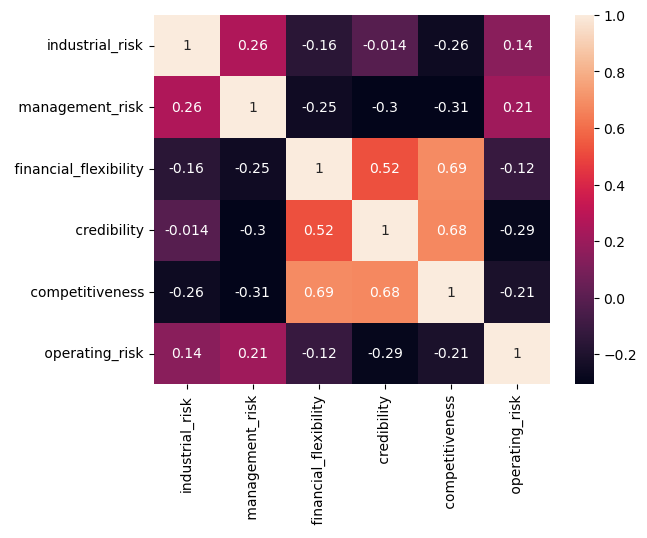

In [63]:
sn.heatmap(data.corr() , annot = True)

In [64]:
 data = data.rename(columns = {'industrial_risk':'industries_risk' , 'management_risk':'Managements_risk', 'financial_flexibility':'Financial_Flexibility','credibility':'Credibility','competitiveness':'Competitiveness','operating_risk':'Operating_risk' , 'class':'Classes'} )

In [65]:
data

,industries_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [66]:
data['industries_risk']

0      0.5
1      0.0
2      1.0
3      0.5
4      1.0
      ... 
245    0.0
246    1.0
247    0.0
248    1.0
249    1.0
Name: industries_risk, Length: 250, dtype: float64

<Axes: xlabel='industries_risk', ylabel='Count'>

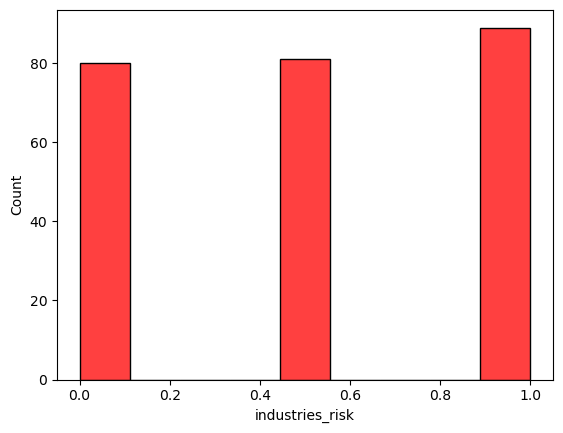

In [67]:
sn.histplot(data['industries_risk'] , color = 'red')

C:\Users\user\AppData\Local\Temp\ipykernel_7912\148972730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['industries_risk'], color = 'red')


<Axes: xlabel='industries_risk', ylabel='Density'>

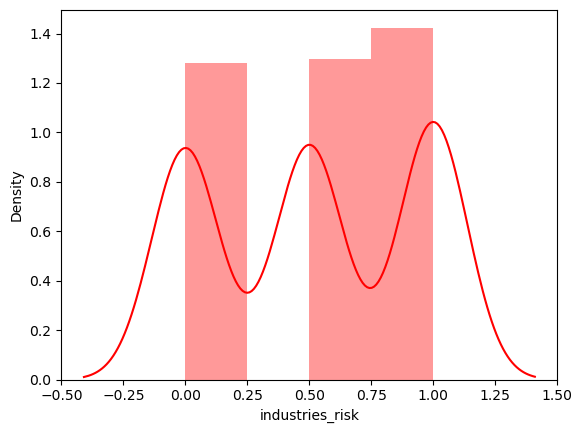

In [68]:
sn.distplot(data['industries_risk'], color = 'red')

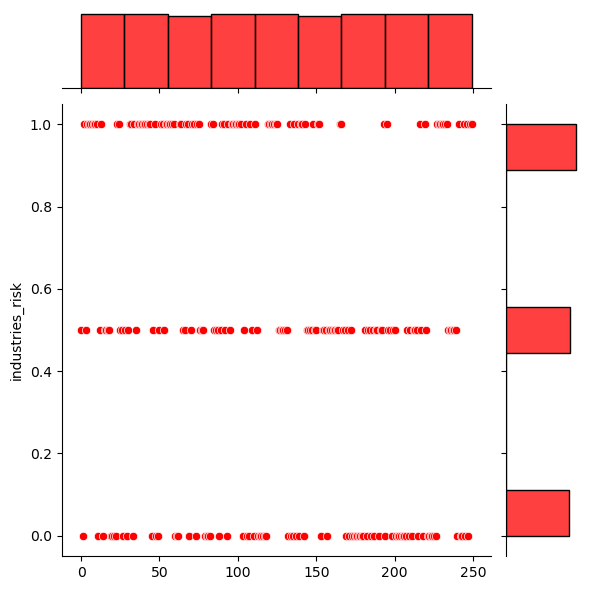

In [69]:
sn.jointplot(data['industries_risk'], color = 'red')

# joint plot consist both histogram plot & scatter plot, shown pattern of the distribution of the data points

<Figure size 3400x1000 with 0 Axes>

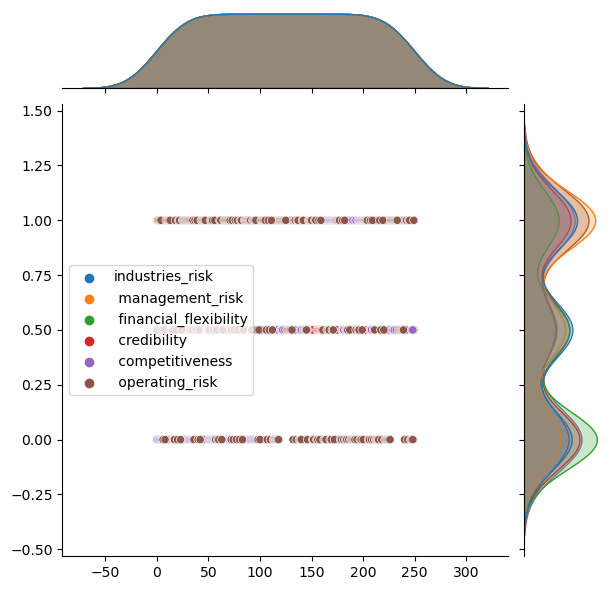

In [70]:
plt.figure(figsize = (34,10))
sn.jointplot(data , color = 'red')

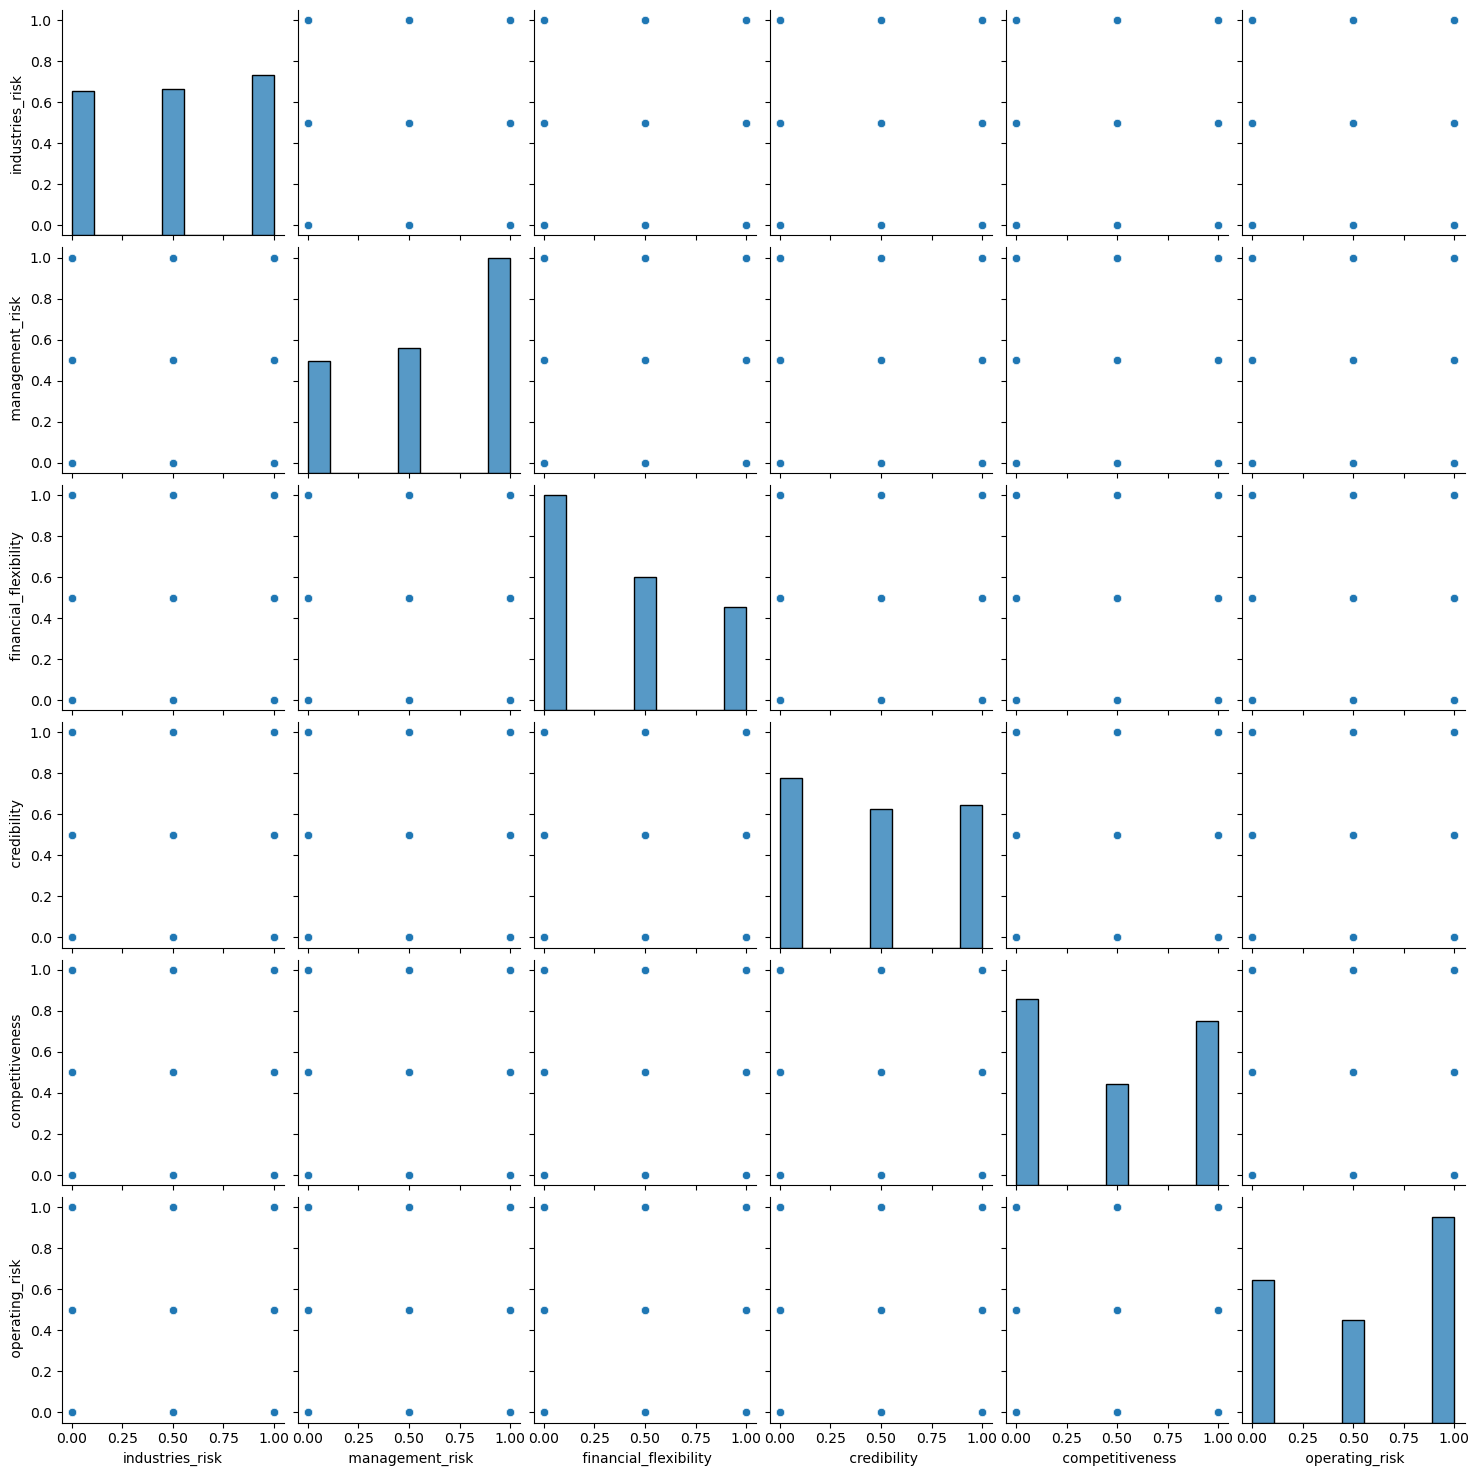

In [71]:
sn.pairplot(data )

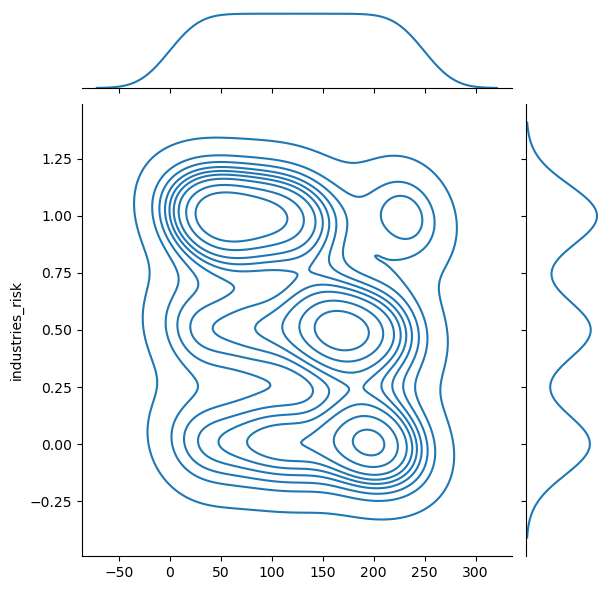

In [72]:
sn.jointplot(data['industries_risk'] , kind = 'kde')

In [73]:
le = LabelEncoder()
data = data.apply(le.fit_transform)

In [83]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform

In [84]:
data

,industries_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,1,2,0,0,0,1,0
1,0,2,0,0,0,2,0
2,2,0,0,0,0,2,0
3,1,0,0,1,0,2,0
4,2,2,0,0,0,2,0
...,...,...,...,...,...,...,...
245,0,2,2,2,2,2,1
246,2,2,1,2,2,0,1
247,0,2,2,1,1,0,1
248,2,0,1,2,1,0,1


In [85]:
x = data.iloc[:,0:6]

In [86]:
x

,industries_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,1,2,0,0,0,1
1,0,2,0,0,0,2
2,2,0,0,0,0,2
3,1,0,0,1,0,2
4,2,2,0,0,0,2
...,...,...,...,...,...,...
245,0,2,2,2,2,2
246,2,2,1,2,2,0
247,0,2,2,1,1,0
248,2,0,1,2,1,0


In [87]:
y = data.iloc[:,6]

In [88]:
y


0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name:  class, Length: 250, dtype: int32

## Train the model by splitting the data into train & test data sets

In [89]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [92]:
x_train.shape  , x_test.shape

((200, 6), (50, 6))


Logistic regression is used to predict the categorical variable where the outcome variable 
 can take only two values , such as 0/1 , its is provided a interpretable result , making it easier to understand the relationship the input features and the predicted probablities, it can handle large datasets with low number of features and can be trained quickly

In [93]:
model = LogisticRegression()

In [94]:
model.fit(x_train , y_train)

LogisticRegression()

## Predict the target value on the test data sets

In [95]:
y_pred = model.predict(x_test)

In [96]:
y_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [97]:
pd.DataFrame(y_pred)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [98]:
result = pd.DataFrame({"Actual":y_test , "predicted":y_pred})

In [99]:
result

,Actual,predicted
142,1,1
6,0,0
97,0,0
60,0,0
112,1,1
181,1,1
197,1,1
184,1,1
9,0,0
104,0,0


In [100]:
accuracy_model = accuracy_score(y_pred , y_test)

#### accuracy is the performance metrics which is used to calculate the accuray of the model in classification problem.

In [101]:
accuracy_model

1.0

In [102]:
classification_result = classification_report(y_pred ,y_test)

In [103]:
print(classification_result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [104]:
confusion_result = confusion_matrix(y_pred , y_test)

In [105]:
confusion_result

array([[21,  0],
       [ 0, 29]], dtype=int64)

In [106]:
from sklearn.metrics import roc_curve

In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
fpr , tpr,_ = roc_curve(y_pred , y_test)
auc = roc_auc_score(y_pred , y_test)
    

Text(0, 0.5, 'tpr')

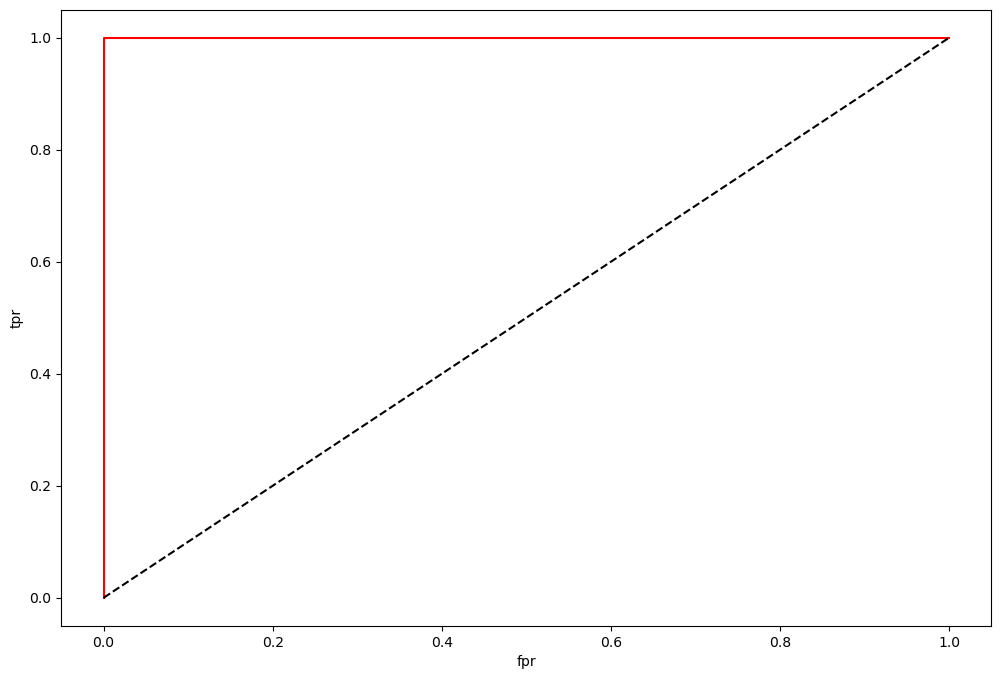

In [109]:
plt.figure(figsize = (12,8))
plt.plot(fpr , tpr , color = 'red' , label = 'ROC CURVE(AUC = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')

## Decision Tree model

In [110]:
model_tree = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [111]:
model_tree.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [112]:
y_pred_tree = model_tree.predict(x_test)

In [113]:
y_pred_tree

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [114]:
pd.DataFrame(y_pred_tree)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [115]:
accuracy_tree = accuracy_score(y_pred_tree , y_test)

In [116]:
accuracy_tree

0.98

In [117]:
classification_tree = classification_report(y_pred_tree , y_test)

In [118]:
print(classification_tree)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.97      1.00      0.98        28

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [119]:
from sklearn.tree import plot_tree

In [120]:
import matplotlib.pyplot as plt

[Text(0.4, 0.875, '0 <= -0.525\nentropy = 0.986\nsamples = 200\nvalue = [86, 114]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(0.6, 0.625, '0 <= -0.558\nentropy = 0.214\nsamples = 118\nvalue = [4, 114]'),
 Text(0.4, 0.375, '0 <= 0.604\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 111\nvalue = [0, 111]')]

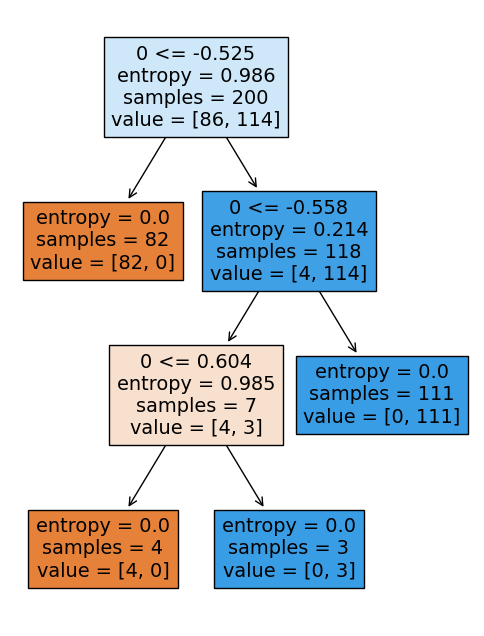

In [121]:
plt.figure(figsize = (6,8))
plot_tree(model_tree , filled = True , feature_names = y )

### Decision tree is suprevised  machine learning technique , can be used for both regression and classification model , the basic intuition behind the decision tree is to map all decision path in the form of tree , where each internal node represent feature or attribute, each branch represent a decision rule , and each leaf node represent the outcome and class label.

## Random Forest Classifier
### it is ensemble machine learning algorithm  , that combine multiple descision tree to make the prediction  , it is widely used for both regression and classification tasks.

In [122]:
model_random = RandomForestClassifier(n_estimators = 100 , max_features = 3)

#### max_features is the parameter that determines the maximum number of feature tp consider for best split at each node of the decision tree.

#### n_estimators it is the parameter that determine number of decision tree to be included in the random forest , each decision tree is build using randomly sample subset of training data.

In [123]:
model_random

RandomForestClassifier(max_features=3)

In [124]:
from sklearn.model_selection import cross_val_score

### Cross validation technique is used in the machine learning to assess the performance and generalization ability of a model, cross validation score is the metrics that quantifies the models performance based on the validation data , it provide most reliable estimate of the model performance compared to single train test split , it help to assess how well the model is likely  to perform on useen the data by simulating the model performance.

In [125]:
cross_val = cross_val_score(model_random , x , y ,cv = 10)

In [126]:
print(cross_val.mean())

0.9960000000000001


In [127]:
model_random.fit(x_train , y_train )

RandomForestClassifier(max_features=3)

In [128]:
y_pred_random = model_random.predict(x_test)

In [129]:
y_pred_random

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [130]:
pd.DataFrame({"Actual": y_test , "Predicted": y_pred_random})

,Actual,Predicted
142,1,1
6,0,0
97,0,0
60,0,0
112,1,1
181,1,1
197,1,1
184,1,1
9,0,0
104,0,0


In [131]:
classification_random = classification_report(y_pred_random , y_test)

In [132]:
print(classification_random)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [133]:
accuracy_random = accuracy_score(y_pred_random , y_test)

In [134]:
accuracy_random

1.0

## Bagging Classifier

## It is the ensemble technique , it is also known as bootstarp aggregation technique which is used to make final prediction of classification model by combining a different prediction of multiple classification model according to their weight , weight = accuracy of the model.

#### random_state it is used to control the randomness or reproducibility of the algorithm behavior.

In [135]:
model_bagging = BaggingClassifier(base_estimator = model_random , n_estimators = 10 , random_state = 42)

In [136]:
model_bagging

BaggingClassifier(base_estimator=RandomForestClassifier(max_features=3),
                  random_state=42)

In [137]:
model_bagging.fit(x_train , y_train )

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(max_features=3),
                  random_state=42)

In [138]:
y_pred_bagging = model_bagging.predict(x_test)

In [139]:
y_pred_bagging

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [140]:
pd.DataFrame(y_pred_bagging)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [141]:
accuracy_bagging = accuracy_score(y_pred_bagging , y_test)

In [142]:
accuracy_bagging

0.98

In [143]:
classification_bagging = classification_report(y_pred_bagging , y_test)

In [144]:
print(classification_bagging)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.97      1.00      0.98        28

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Voting Classifier

In [145]:
from sklearn.ensemble import VotingClassifier

In [146]:
model_voting = VotingClassifier(estimators = [('mr',model_random),('mb' , model_bagging)])

In [147]:
model_voting.fit(x_train , y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('mr', RandomForestClassifier(max_features=3)),
                             ('mb',
                              BaggingClassifier(base_estimator=RandomForestClassifier(max_features=3),
                                                random_state=42))])

In [148]:
y_pred_vot = model_voting.predict(x_test)

In [149]:
y_pred_vot

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [150]:
pd.DataFrame(y_pred_vot)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [151]:
accuracy_voting = accuracy_score(y_pred_vot , y_test)

In [152]:
accuracy_voting

0.98

In [153]:
classification_voting = classification_report(y_pred_vot , y_test)

In [154]:
print(classification_voting)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.97      1.00      0.98        28

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## SVM MODEL

#### support vector machine is supervised algorithm that classifiy casses by finding seperator , svm works by first mapping the data to a high dimensional features space so the data point can be categorized.

In [155]:
from sklearn.svm import SVC

In [156]:
model_svc = SVC()

In [157]:
model_svc

SVC()

In [158]:
model_svc.fit(x_train , y_train)

SVC()

In [159]:
y_pred_svc = model_svc.predict(x_test)

In [160]:
y_pred_svc

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0])

In [161]:
pd.DataFrame(y_pred_svc)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [162]:
accuracy_svc = accuracy_score(y_pred_svc , y_test)

In [163]:
accuracy_svc

1.0

In [164]:
classification_svc = classification_report(y_pred_svc , y_test)

In [165]:
print(classification_svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [166]:
data.shape

(250, 7)

## Neural Network Model for classification

In [167]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , stratify = y )

In [168]:
model_neural = Sequential()
model_neural.add(Dense(5 , input_dim = 6 , activation = 'tanh'))
model_neural.add(Dense(1 , activation = 'sigmoid'))


### Dense = 5 means that 5 nodes are completely connected , and sigmoid function is also known as logistics function  , activation = tanh it stands for hyperbolic tangent  , it is mathematical function commonly used as function in artificial neural network 

In [169]:
model_neural.compile(loss = 'binary_crossentropy' , optimizer = 'Adam' , metrics = ['accuracy'])

In [170]:
model_neural.fit(x_train , y_train , validation_split = 0.30 , epochs = 20  , batch_size = 3)

Epoch 1/20
47/47 [==============================] - 1s 8ms/step - loss: 0.7543 - accuracy: 0.5786 - val_loss: 0.7134 - val_accuracy: 0.5833
Epoch 2/20
47/47 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.6214 - val_loss: 0.6486 - val_accuracy: 0.6667
Epoch 3/20
47/47 [==============================] - 0s 3ms/step - loss: 0.6207 - accuracy: 0.6571 - val_loss: 0.5879 - val_accuracy: 0.6667
Epoch 4/20
47/47 [==============================] - 0s 4ms/step - loss: 0.5595 - accuracy: 0.6857 - val_loss: 0.5309 - val_accuracy: 0.7333
Epoch 5/20
47/47 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.7857 - val_loss: 0.4752 - val_accuracy: 0.8000
Epoch 6/20
47/47 [==============================] - 0s 4ms/step - loss: 0.4466 - accuracy: 0.8357 - val_loss: 0.4223 - val_accuracy: 0.9000
Epoch 7/20
47/47 [==============================] - 0s 3ms/step - loss: 0.3948 - accuracy: 0.8857 - val_loss: 0.3712 - val_accuracy: 0.9667
Epoch 8/20
47/47 [==

## Visualization 

<Axes: >

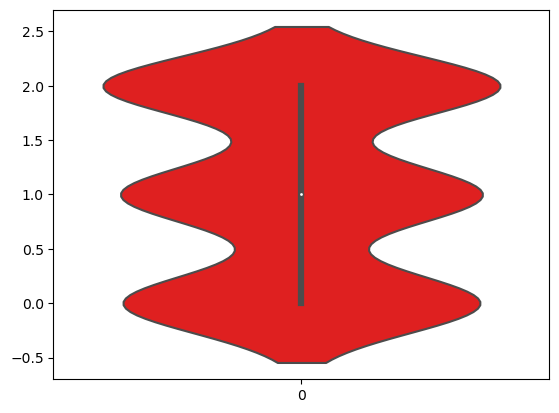

In [171]:
sn.violinplot(data['industries_risk'] , color = 'red')

<Axes: >

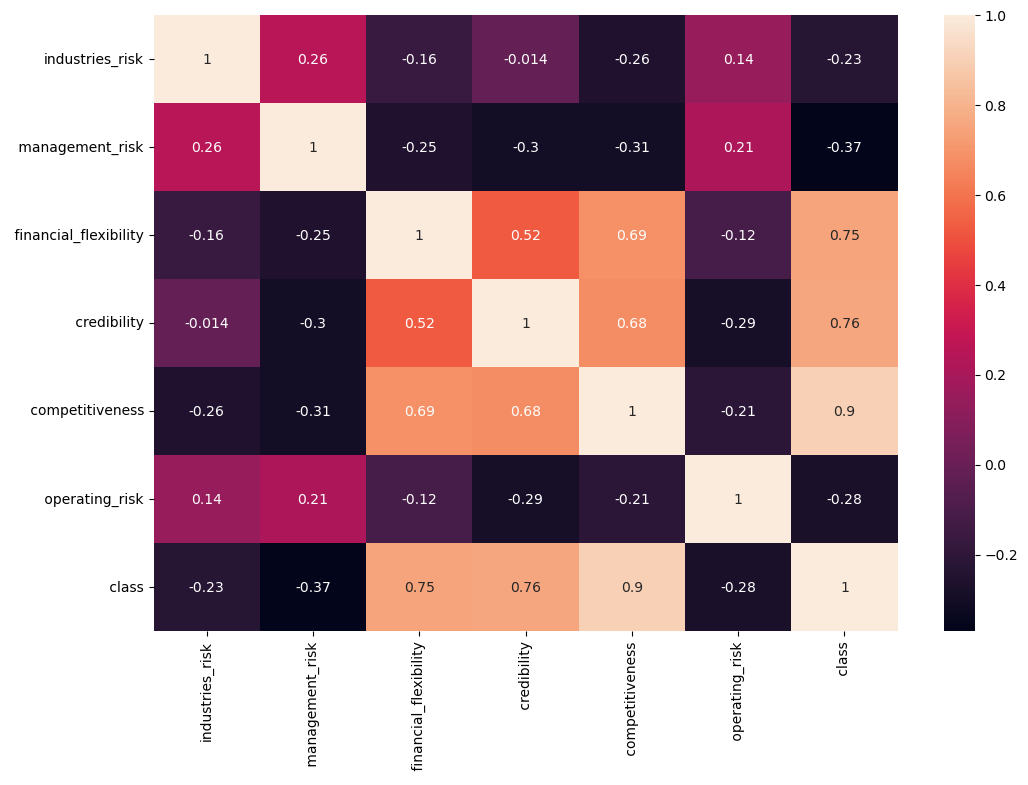

In [172]:
plt.figure(figsize = (12,8))
sn.heatmap(data.corr(), annot = True)

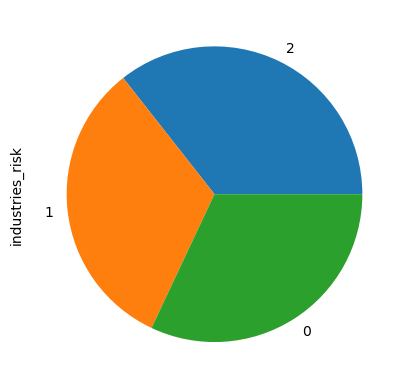

In [173]:
piechart = data['industries_risk'].value_counts().plot(kind = 'pie')

In [174]:
data.industries_risk.value_counts()

2    89
1    81
0    80
Name: industries_risk, dtype: int64

<Axes: >

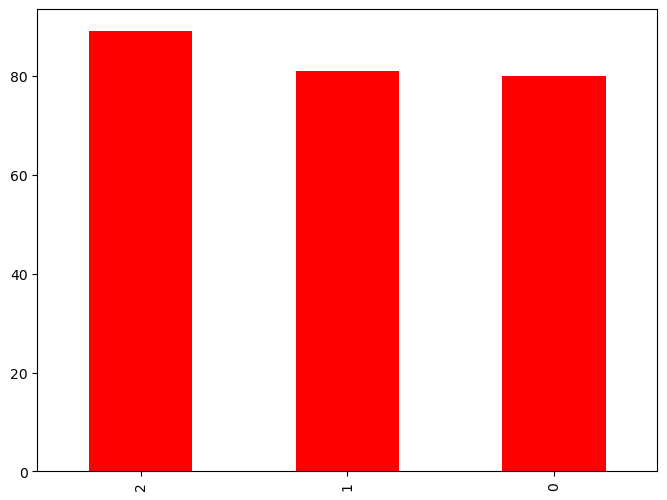

In [175]:
plt.figure(figsize = (8,6))
data.industries_risk.value_counts().plot(kind = 'bar' , color = 'red')

{'whiskers': [<matplotlib.lines.Line2D at 0x15622bfcbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x15622dd01c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15622bff730>],
 'medians': [<matplotlib.lines.Line2D at 0x15622dd2c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x15622dd2e00>],
 'means': []}

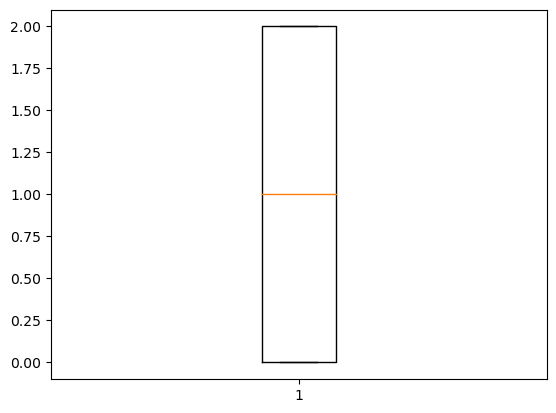

In [176]:
plt.boxplot(data['industries_risk'])

<Axes: >

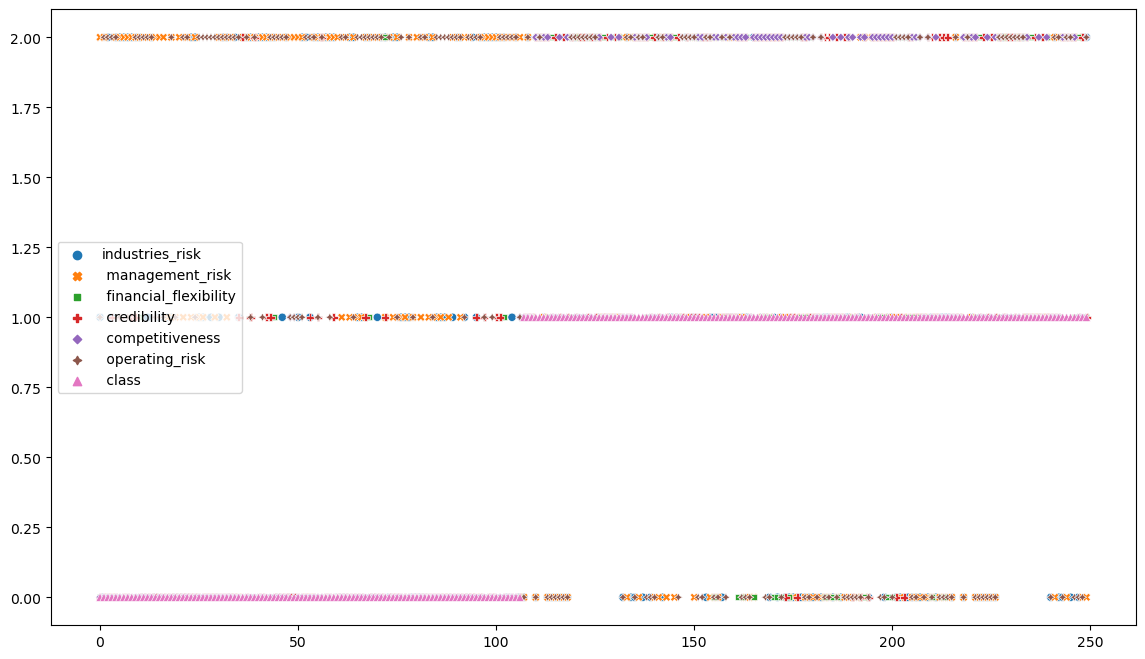

In [177]:
plt.figure(figsize = (14 , 8))
sn.scatterplot(data)

In [178]:
import pickle

pickle.dump(sc,open("scaler.pickle","wb"))
ssc = pickle.load(open("scaler.pickle",'rb'))

pickle.dump(model_voting,open('vtclassifier.pkl','wb'))

model = pickle.load(open('vtclassifier.pkl','rb'))

In [179]:
sample = ssc.transform(x_test)
sample

array([[ 1.1514905 ,  0.9900495 ,  1.575384  ,  0.03562604,  1.16908112,
         1.01236401],
       [ 1.1514905 ,  0.9900495 , -0.91534169, -1.15190852, -1.09001283,
         1.01236401],
       [-0.07349939, -1.41007051,  1.575384  ,  1.2231606 ,  1.16908112,
         1.01236401],
       [-1.29848929, -1.41007051,  1.575384  ,  0.03562604,  1.16908112,
        -1.28846329],
       [-1.29848929,  0.9900495 ,  1.575384  ,  0.03562604,  0.03953414,
        -1.28846329],
       [ 1.1514905 ,  0.9900495 ,  1.575384  ,  1.2231606 ,  1.16908112,
         1.01236401],
       [-1.29848929, -1.41007051,  0.33002115,  0.03562604,  0.03953414,
        -1.28846329],
       [-1.29848929,  0.9900495 , -0.91534169, -1.15190852, -1.09001283,
         1.01236401],
       [-0.07349939,  0.9900495 , -0.91534169, -1.15190852, -1.09001283,
        -0.13804964],
       [ 1.1514905 ,  0.9900495 , -0.91534169, -1.15190852, -1.09001283,
        -1.28846329],
       [ 1.1514905 ,  0.9900495 ,  1.575384  ,  1.

In [180]:
model.predict(sample)

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1])

In [181]:
y_test

125    1
90     0
154    1
118    1
139    1
219    1
215    1
93     0
16     0
6      0
195    1
248    1
247    1
79     0
237    1
124    1
114    1
245    1
150    1
68     0
226    1
165    1
17     0
34     0
70     0
192    1
10     0
163    1
207    1
83     0
63     0
167    1
40     0
32     0
13     0
177    1
116    1
58     0
141    1
102    0
189    1
158    1
101    0
214    1
54     0
194    1
180    1
29     0
97     0
193    1
Name:  class, dtype: int32

In [182]:
cm = confusion_matrix(y_test , y_pred)

In [183]:
cm

array([[ 8, 13],
       [13, 16]], dtype=int64)

Text(58.222222222222214, 0.5, 'actual')

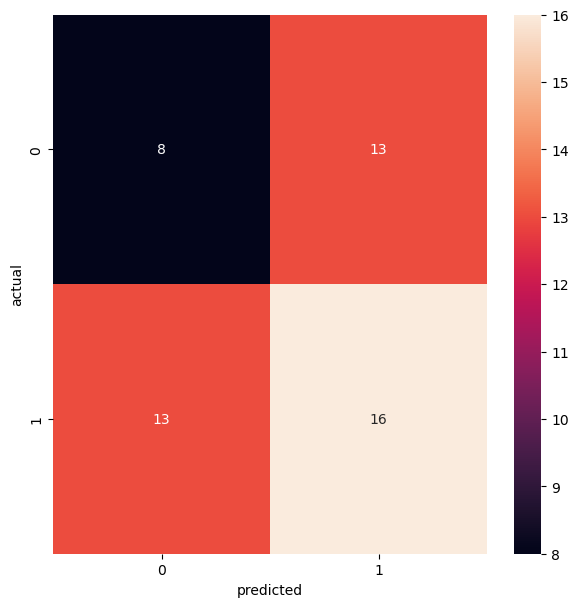

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
sn.heatmap(cm,annot = True)
plt.xlabel('predicted')
plt.ylabel('actual')

## Models Comparision

In [230]:
pd.DataFrame({"Accuracy":[1.0,0.98,1.0,0.98,0.98,1.0,1.0] , "Model_names": ['Logistic_regression' , 'Decision_tree' , 'Random_forest' , 'Bagging_classifier','voting_classifier','SVM','Neural_Network']})


,Accuracy,Model_names
0,1.00,Logistic_regression
1,0.98,Decision_tree
2,1.00,Random_forest
3,0.98,Bagging_classifier
4,0.98,voting_classifier
5,1.00,SVM
6,1.00,Neural_Network
